# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
## Халимонов А.М. ИУ5-63Б

#### Набор данных 
https://www.kaggle.com/fernandol/countries-of-the-world
#### Задание
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных.
2. Для выбранного датасета на основе материалов лекции решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка набора данных
data = pd.read_csv('../countries_dataset.csv', decimal=',')

In [3]:
# размер набора данных
data.shape

(227, 20)

In [4]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Обработка пропусков данных


In [6]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Net migration. Тип данных float64. Количество пустых значений 3, 1.32%.
Колонка Infant mortality (per 1000 births). Тип данных float64. Количество пустых значений 3, 1.32%.
Колонка GDP ($ per capita). Тип данных float64. Количество пустых значений 1, 0.44%.
Колонка Literacy (%). Тип данных float64. Количество пустых значений 18, 7.93%.
Колонка Phones (per 1000). Тип данных float64. Количество пустых значений 4, 1.76%.
Колонка Arable (%). Тип данных float64. Количество пустых значений 2, 0.88%.
Колонка Crops (%). Тип данных float64. Количество пустых значений 2, 0.88%.
Колонка Other (%). Тип данных float64. Количество пустых значений 2, 0.88%.
Колонка Climate. Тип данных float64. Количество пустых значений 22, 9.69%.
Колонка Birthrate. Тип данных float64. Количество пустых значений 3, 1.32%.
Колонка Deathrate. Тип данных float64. Количество пустых значений 4, 1.76%.
Колонка Agriculture. Тип данных float64. Количество пустых значений 15, 6.61%.
Колонка Industry. Тип данных float6

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

data_colum = data[["Industry"]]
data[data["Industry"].isnull()].shape[0]

16

In [8]:
def impute_column(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_colum)
    return data_num_imp

In [9]:
new_column = impute_column("mean")
np.count_nonzero(np.isnan(new_column))

0

### Масштабирование данных

In [10]:
# подключение класса MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

In [11]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[['Literacy (%)']])

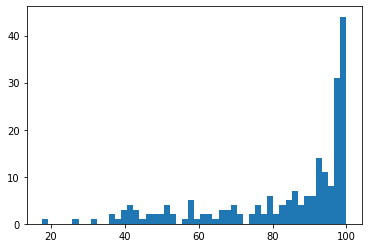

In [12]:
# вывод столбца inspection_score до масштабирования
plt.hist(data['Literacy (%)'], 50)
plt.show()

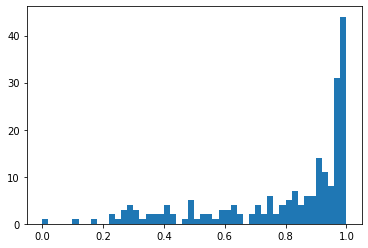

In [13]:
# вывод столбца inspection_score после масштабирования
plt.hist(scaler_data, 50)
plt.show()

### One-hot encoding

In [14]:
oh_encoder = OneHotEncoder()
oh_encoder_data = oh_encoder.fit_transform(data[["Region"]])

In [15]:
data["Region"].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [16]:
oh_encoder_data.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Label encoding

In [17]:
l_encoder = LabelEncoder()
l_encoder_data = l_encoder.fit_transform(data["Region"].ravel())

In [18]:
np.unique(data["Region"])

array(['ASIA (EX. NEAR EAST)         ',
       'BALTICS                            ', 'C.W. OF IND. STATES ',
       'EASTERN EUROPE                     ', 'LATIN AMER. & CARIB    ',
       'NEAR EAST                          ',
       'NORTHERN AFRICA                    ',
       'NORTHERN AMERICA                   ',
       'OCEANIA                            ',
       'SUB-SAHARAN AFRICA                 ',
       'WESTERN EUROPE                     '], dtype=object)

In [19]:
np.unique(l_encoder_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
l_encoder.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array(['ASIA (EX. NEAR EAST)         ',
       'BALTICS                            ', 'C.W. OF IND. STATES ',
       'EASTERN EUROPE                     ', 'LATIN AMER. & CARIB    ',
       'NEAR EAST                          ',
       'NORTHERN AFRICA                    ',
       'NORTHERN AMERICA                   ',
       'OCEANIA                            ',
       'SUB-SAHARAN AFRICA                 ',
       'WESTERN EUROPE                     '], dtype=object)